__`NOTEBOOK START`__

-----------

# __I - DATA DISCOVERY__

--------------

#### __SECTION GOALS__ 🎯

In this section, we going to get a first sense of the data we are working with by:
 
- Taking a first look at our DF

- Displaying the main statistics 

- Organizing our variables to get a better sens of our DF

- Looking for missing values 

- Visualizing those missing value to set up our strategy to deal with them in the next section

---------

In [1]:
"""%pip install openpyxl"""

Note: you may need to restart the kernel to use updated packages.


In [2]:
print('>>>> 📚 Importing librairies...')
import pandas as pd
pd.set_option('display.max_column', 200)
pd.set_option('display.max_rows', 200)
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)
print('>>>> ✅ ...Done')

>>>> 📚 Importing librairies...


>>>> ✅ ...Done


In [3]:
print('>>>> 📊 Loading dataset...')
df = pd.read_excel('Speed_Dating_Data.xlsx')
print('>>>> ✅ ...Done')
print()

>>>> 📊 Loading dataset...
>>>> ✅ ...Done



---------
### __1. A FIRST LOOK AT OUR DATA FRAME__
---------

In [4]:
print()
print('Display of dataset: ')
print()
display(df.head(11))

print()
print('Main statistics: ')
print()
df_stats = df.describe(include='all')
display(df_stats)


Display of dataset: 



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60.521,"69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60.521,"69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60.521,"69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,5.00,1


Main statistics: 



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7294.000000,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,NaN,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
print(df.columns.tolist())
#These are the columns we are dealing with in this df

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [6]:
rows = df.shape[0]
columns = df.shape[1]
number_of_elements = df.size

print()
print ('Our data frame shape:')
print (f' - Number of columns/features: {columns}')
print (f' - Number of rows: {rows}')
print (f' - Number of elements: {number_of_elements}')


Our data frame shape:
 - Number of columns/features: 195
 - Number of rows: 8378
 - Number of elements: 1633710


In [7]:
df.info()
# we can also check each columns types with df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(13), object(7)
memory usage: 12.5+ MB


__FIRST OBSERVATIONS:__<br>

- Our DF contains a lot of columns/features as well as many rows with NaN values, we'll have to investigate further.

- On another point, we have 8378 rows but does it mean that we have 8378 participants. Actually, we can already see that one participant can appear multiple times in the column 'iid'. This situation can give us a wrong understanding of our statistics, so we'll have to investigate further when will dive into analyzing our df.

- We have 3 types of variables:
    * Float (175)
    * Integer (13)
    * Object (7)

---------
### __2. ORGANIZING OUR VARIABLES BASED ON THE SPEED DATING DATA KEY DOCUMENT__
---------

As we saw above, we have a lot of columns/variables. One way to actually help us understand our data is to group those variables by the time they actually appear in our word document

#### __a. Speed Dating Information__


In [8]:
# Grouping all the information about the participants situation durnig the dates
# round: number of people that met in wave
# position: station number where met partner 
# positin1:	station number where started 
# order: the number of date that night when met partner
# partner: partner’s id number the night of event
# pid: partner’s iid number
# match: 1=yes, 0=no
# int_corr:	correlation between participant’s and partner’s ratings of interests in Time 1

speed_dating_info = [ 'round', 'position', 'positin1', 'order', 'partner', \
                      'pid', 'match', 'int_corr']

#### __b. Participants partners background__


In [9]:
# samerace: participant and the partner were the same race. 1= yes, 0=no
# age_o: age of partner
# race_o: race of partner
# pf_o_att: partner’s stated preference at Time 1 (attr1_1) for all 6 attributes
# dec_o: decision of partner the night of event
# attr_o: rating by partner the night of the event, for all 6 attributes

participants_partners_bakcground = ['samerace', 'age_o', 'race_o', 'pf_o_att', 'dec_o', 'attr_o']

#### __c. Signup - Time1__
#### Survey filled out by students that are interested in participating in order to register for the event.

In [10]:
# Survey filled out by students that are interested in participating in order to register for the event.

signup = ['age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition',\
          'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income',\
          'goal', 'date', 'go_out', 'career', 'career_c']

In [11]:
# How interested are you in the following activities, on a scale of 1-10?

activities = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', \
              'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', \
              'concerts', 'music', 'shopping', 'yoga']

In [12]:
# Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?
# Out of the 20 people you will meet, how many do you expect will be interested in dating you? 

happiness_and_partners_interest = ['exphappy', 'expnum']

In [13]:
# We want to know what you look for in the opposite sex.
# attr = Attractive
# sinc = Sincere
# intel = Intelligent
# fun = Fun
# amb = Ambitious
# shar = Has shared interests/hobbies
signup_attributes_q1 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.
signup_attributes_q2 = ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']

# What do you think the opposite sex looks for in a date?
signup_attributes_q3 = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']

# How do you think you measure up?
signup_attributes_q4 = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'shar3_1']

# And finally, how do you think others perceive you? 
signup_attributes_q5 = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'shar5_1']

#### __d. Scorecard__
#### Filled out by subjects after each "date" during the event

In [14]:
# Circle “Yes” or “No” below the ID number of each person you meet to indicate whether or not you would like to see him or her again
# Rate their attributes on a scale of 1-10
scorecard = ['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']

# How many matches do you estimate you will get (a match occurs when you and your partner both check “Yes” next to decision)?
scorecard_match = ['match_es']

# We want to know what you look for in the opposite sex
scorecard_attributes_q1 = ['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']

# Please rate your opinion of your own attributes
scorecard_attributes_q2 = ['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']

#### __e. Followup - Time2__
#### Survey is filled out the day after participating in the event.  Subjects must have submitted this in order to be sent their matches.

In [15]:
# satis_2 = Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied)
# length = Four minutes is: Too little=1 Too much=2 Just Right=3
# numdat_2 = The number of Speed "Dates" you had was: Too few=1 Too many=2 Just right=3
satisfaction = ['satis_2', 'length', 'numdat_2']

# Now, think back to your yes/no decisions during the Speed Dating event.  
# Try to distribute the 100 points among these six attributes in the way that best reflects the actual importance of these attributes in your decisions.
followup_attributes_q1 = ['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']

# We want to know what you look for in the opposite sex
followup_attributes_q2 = ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']

# What do you think MOST of your fellow men/women look for in the opposite sex?
followup_attributes_q3 = ['attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2']

# What do you think the opposite sex looks for in a date?
followup_attributes_q4 = ['attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2']

# How do you think you measure up?
followup_attributes_q5 = ['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']

# And finally, how do you think others perceive you?
followup_attributes_q6 = ['attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']

#### __f. Followup2 - Time3__
#### Subjects filled out 3-4 weeks after they had been sent their matches



In [16]:
#  Of the matches that you received:
# you_call = How many have you contacted to set up a date?
# them_cal = How many have contacted you?
# date_3 = Have you been on a date with any of your matches? Yes=1 No=2
# If you have been on at least one date, please answer the following:
# numdat_3 =  How many of your matches have you been on a date with so far?
# num_in_3 = If yes, how many?
followup2 = ['you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3']

# What do you look for in the opposite sex?
followup2_attributes_q1 = ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']

# Now, think back to your yes/no decisions during the night of the Speed Dating event.  
# Try to distribute the 100 points among these six attributes in the way that best reflects the actual importance of these attributes in your decisions
followup2_attributes_q2 = ['attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3']

# Now we want to know what you think MOST of your fellow men/women look for in the opposite sex
followup2_attributes_q3 = ['attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3']

# What do you think the opposite sex looks for in a date? 
followup2_attributes_q4 = ['attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3']

# Please rate your opinion of your own attributes
followup2_attributes_q5 = ['attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3']

# And finally, how do you think others perceive you?
followup2_attributes_q6 = ['attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']

__OBSERVATIONS:__<br>
- I think it's worth noting that not all the columns in our DF have a description on the word document. 

- Even though their significations could be deductated by following the author methodology, we can't be 100% sure of their signification as it is missing from the speed dating key document. 

---------
### __3. LOOKING FOR MISSING VALUES__
---------

In [17]:
# Here I created a function that will return the percentage and the quantity of missing values in our DF
def missing_values():
    
    missing = (pd.DataFrame(df.isnull().sum()/df.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

missing_values()

,Percentage of Missing Values,Number of Missing Values
num_in_3,92.03,7710
numdat_3,82.14,6882
expnum,78.52,6578
sinc7_2,76.67,6423
amb7_2,76.67,6423
shar7_2,76.44,6404
attr7_2,76.32,6394
intel7_2,76.32,6394
fun7_2,76.32,6394
amb5_3,75.94,6362


In [18]:
print ('Missing values in our DF:')
print()
# Missing Values
mv = df.isnull().values.sum()
print (f'- Total Number of missing values: {mv}')

# Non Missing Values
nmv = df.notnull().values.sum()
print (f'- Total Number of non missing values: {nmv}')

# total number of values in our df
tv = (df.isnull().values.sum())+(df.notnull().values.sum())
print (f'- Overall, we have a total of {tv} cells in our DF/Excel file')

# Percentage Missing Values
pmv = ((df.isnull().values.sum()/((df.isnull().values.sum())+(df.notnull().values.sum()))*100).round(2))

print (f'- There are {pmv}% of missing values in our DF')

Missing values in our DF:

- Total Number of missing values: 432036
- Total Number of non missing values: 1201674
- Overall, we have a total of 1633710 cells in our DF/Excel file
- There are 26.45% of missing values in our DF


__OBSERVATIONS:__<br>
- The DF contains a significant percentage of missing values with 26.45%.

- The missing values are not equally distributed accross our variables. Some column such as 'num_in_3' has almost no values with 92.03% of them missing, so 7710 values missing out of 8378 entries.

---------
### __4. VISUALIZING MISSING VALUES__
---------

I think we can get a better idea of all these missing values by visualizing them with a heat map:

<AxesSubplot:title={'center':'DF HEATMAP'}>

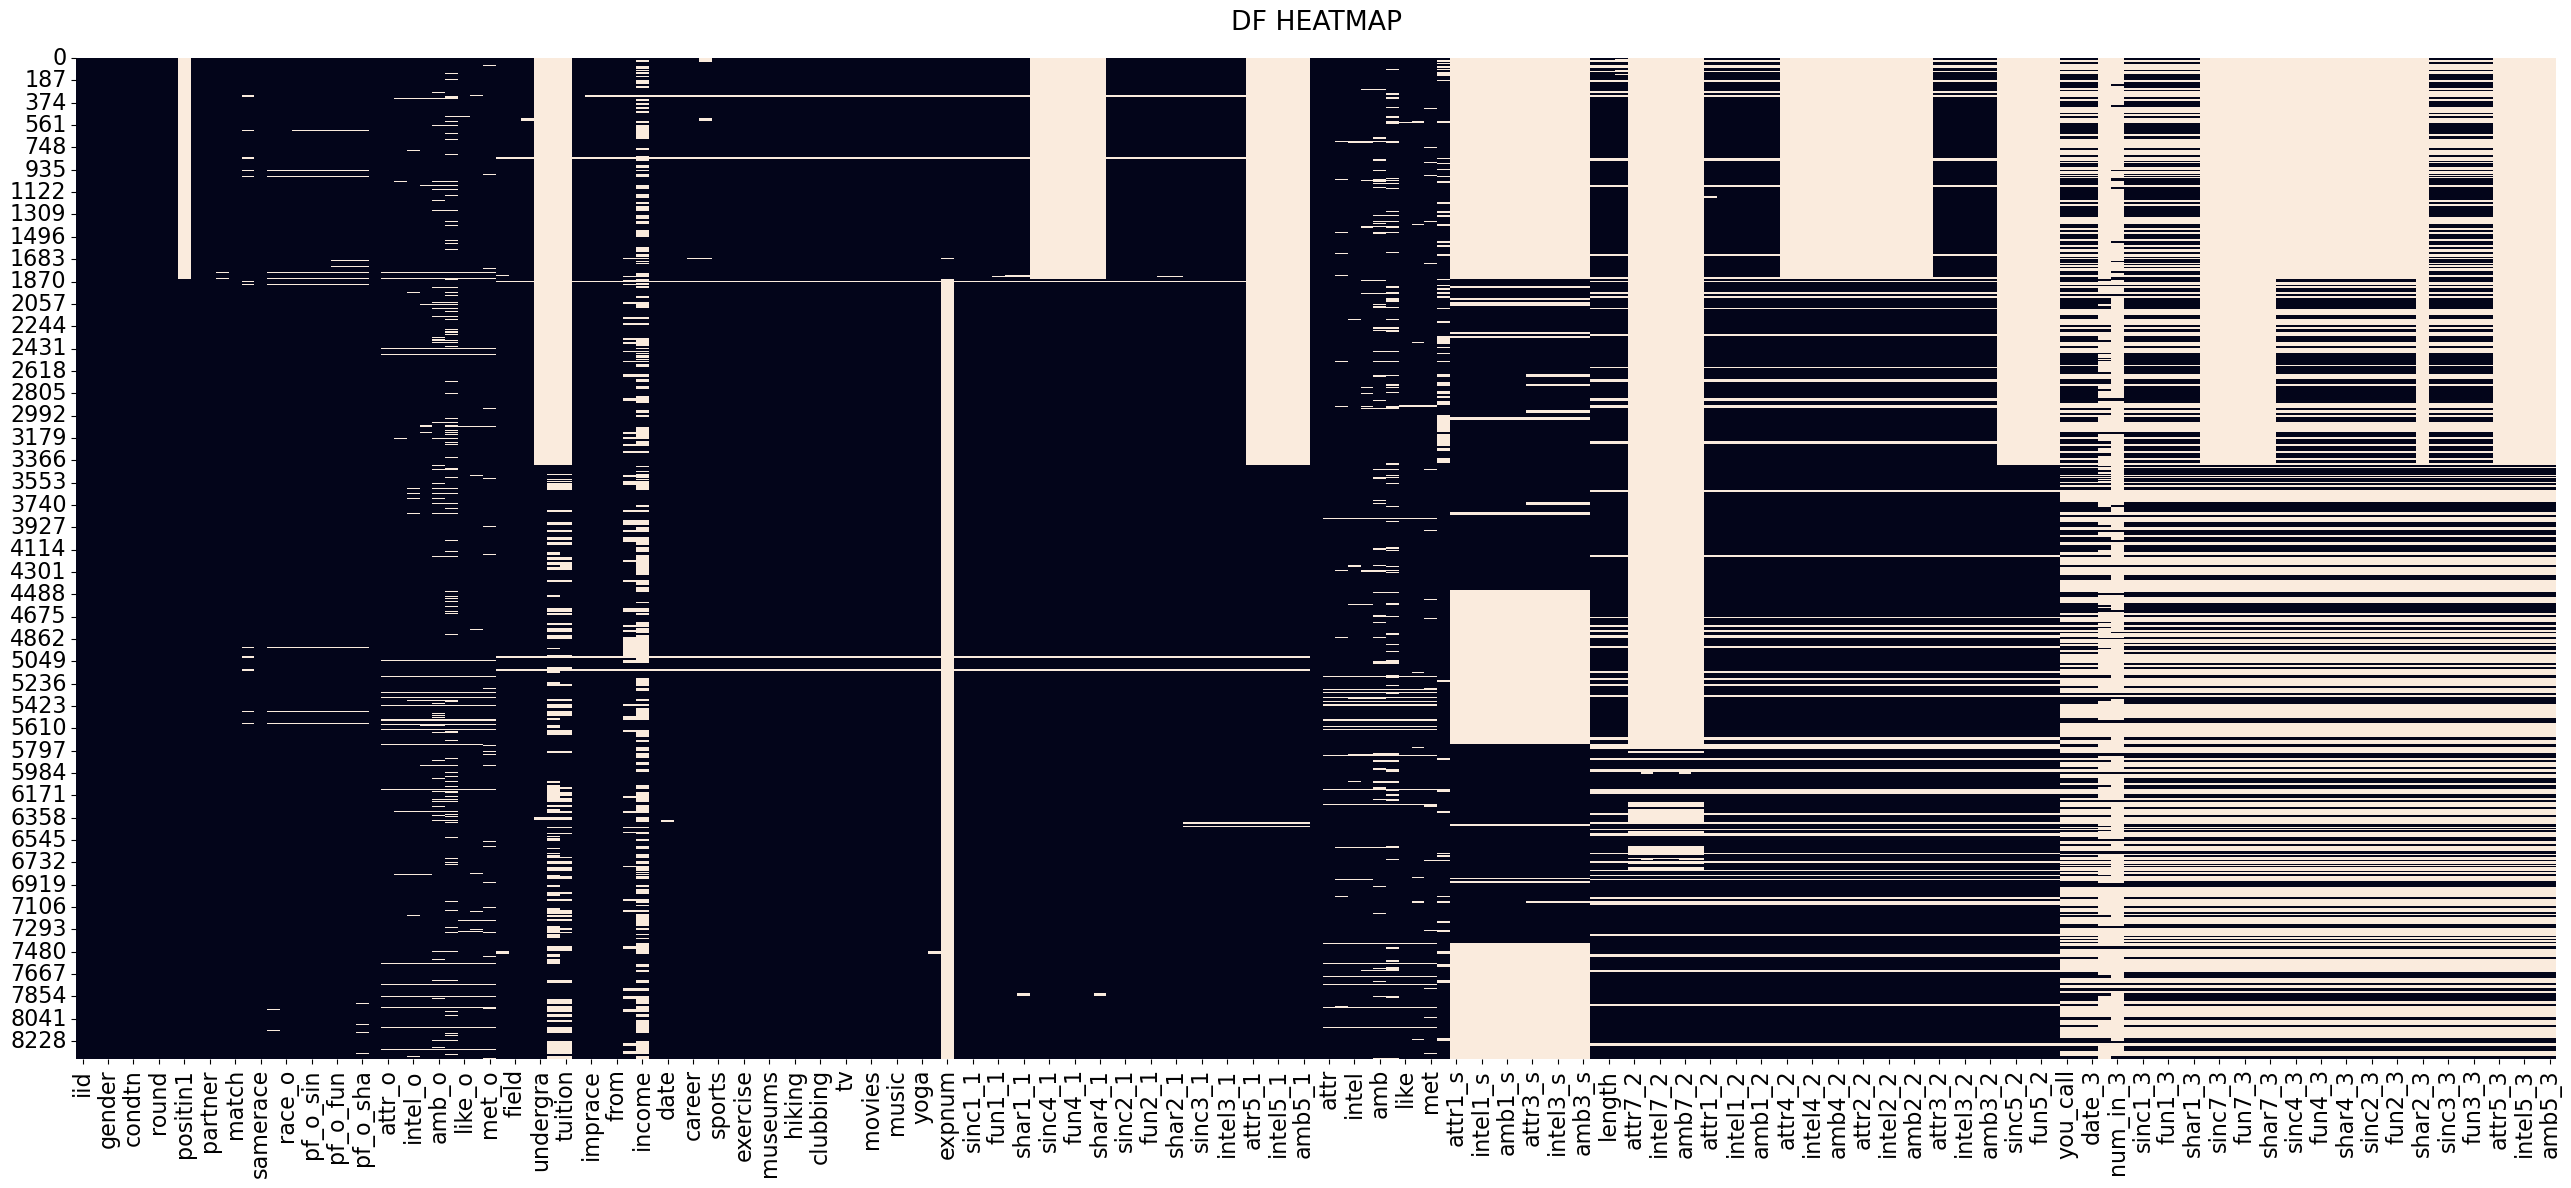

In [19]:
# Creating a figure to have a bigger heatmap
plt.figure(figsize =(32,13))

# Setting up the title
plt.title("DF HEATMAP", y=1.02)

# Creating the heatmap. 
# In black are the rows that contains values. In beige are the rows with missing values.
sns.heatmap(df.isnull(), cbar=False)

__OBSERVATIONS:__<br>

- Having this information about where those missing values are, how much are missing and how distributed they are will allow me to properly clean this DF in the second part the EDA, before diving deeper into our analysis.

- Worth noting, some column with missing value actually give us an information. For instance the column with the most missing information can be explained as follow: people had to respond to the question related to this column only if the answer to the question "If you have been on at least one date, please answer the following" was positive. So we have two hypothese here, whether people did not answer the survey or they actually did not had at least one date, so we'll investigate further in our third part of our EDA to get an answer.

---------
# __DATA DISCOVERY CONCLUSION__
- Our original Data Frame holds 8 378 rows and 195 columns

- We are dealing with three types of data: 175 varibales are floats, 13 are intergers and 7 are objects.

- Overall, we have a total of 1 633 710 cells in our DF/Excel file

- The total number of missing values is 432 036

- The total number of non missing values is 1 201 674

- There are 26,45% of missing values in our DF<br><br>

---------

# <center>__II - DIVING DEEPER IN OUR DF__</center>

--------

#### __SECTION GOALS__ 🎯

In this section we are going to explore in greater details the participants of our speed dating event. 

- Furthermore, we'll check what variables influence the chance to get the second date. 

---------

In [20]:
# I create a new df with only the number of participants in this event
df_participants = df.drop_duplicates(subset=['iid'])

In [21]:
print()
print ('🔎 A quick look at what our DF looks like:')
print()
df_participants.head()


🔎 A quick look at what our DF looks like:



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60.521,"69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,35.223,"65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,0,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,6.268,NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.0,NaN,

---------
### __1. Improving our DF readability when plotting graphs__
---------

In [22]:
# First, I create dictionaries to map the values that I want to change
mapping_1 = {1 : 'Several times a week',
            2 : 'Twice a week',
            3 : 'Once a week', 
            4 : 'Twice a month',
            5 : 'Once a month', 
            6 : 'Several times a year', 
            7 : 'Almost never'}

mapping_2 = {1 : 'Seemed like a fun night out',
            2 : 'To meet new people',
            3: 'To get a date',
            4: 'Looking for a serious relationship',
            5: 'To say I did it',
            6: 'Other'}

mapping_3 = {1:'Black/African American',
            2: 'European/Caucasian-American',
            3: 'Latino/Hispanic American',
            4: 'Asian/Pacific Islander/Asian-American',
            5: 'Native American',
            6: 'Other'}

mapping_4 = {1: 'Men',
            0: 'Women'}

In [23]:
# Then I specify the columns to map, the columns concerned by the modification
cols_to_map_1 = ['date', 'go_out']
cols_to_map_2 = ['goal']
cols_to_map_3 = ['race']
cols_to_map_4 = ['gender']
cols_to_map_5 = ['race_o']


In [24]:
# Finally, I create a loop to go through the columns of my DataFrame I want to change the values of
for col in df_participants.columns:

    # Then, if the columns are in the list of columns to map, I use the map function to replace the values
    if col in cols_to_map_1:
        # I'm using the map function to replace the values in each column with the corresponding values from the dictionary
        df_participants[col] = df_participants[col].map(mapping_1).fillna(df_participants[col])

    # For the column 'goal'    
    if col in cols_to_map_2:
        # I'm using the map function to replace the values in the dictionnary mapping_2
        df_participants[col] = df_participants[col].map(mapping_2).fillna(df_participants[col])
        
    # For the column 'race'
    if col in cols_to_map_3:
        # I'm using the map function to replace the values in the dictionnary mapping_3
        df_participants[col] = df_participants[col].map(mapping_3).fillna(df_participants[col])
    
     # For the column 'gender'
    if col in cols_to_map_4:
        # I'm using the map function to replace the values in the dictionnary mapping_3
        df_participants[col] = df_participants[col].map(mapping_4).fillna(df_participants[col])

    # For the column 'race_o'
    if col in cols_to_map_5:
        # I'm using the map function to replace the values in the dictionnary mapping_3
        df_participants[col] = df_participants[col].map(mapping_3).fillna(df_participants[col])

---------
### __2. Setting up our function to plot graphs__
---------

In [25]:
# I'm initializing the figure number that will be displayed next to the title in the graphs
fig_number = 0

# I create a dictionnary with the columns as keys and the sup I want to display as a value
superscript = {
        'race': "Participants ethnic background",
        'goal': "Signup - Time 1 : <i>'What is your primary goal in participating in this event?'</i>",
        'go_out': "Signup - Time 1 : <i>'How often do you go out (not necessarily on dates)?'</i>",
        'date': "Signup - Time 1 : <i>'In general, how frequently do you go on dates?'</i>",
        'imprace': " Signup - Time 1 : <i>How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?</i>",
        'imprelig': " Signup - Time 1 : <i>How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?</i>",
        'exphappy': " Signup - Time 1 : <i>Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?</i>",
        'expnum': " Signup - Time 1 : <i>Out of the 20 people you will meet, how many do you expect will be interested in dating you?</i>", 
        'match': "<i>A match occurs both partner's both check “Yes” next to decision - 0 = No, 1 = Yes</i>",
        'match_es': "Scorecard: <i>How many matches do you estimate you will get (a match occurs when you and your partner both check “Yes” next to decision)?</i>",
        'dec_o': "<i>Decision of partner the night of event</i>"             
}

In [26]:
# I create a function I'll be able to call each time I need to plot a graph
def bivariate_graph_plot(data_frame, columns):
               
    global fig_number

    # I create a for loop to go through each column
    for column in columns:
        
        # I set the color for each gender
        color_map = {'Women': 'rgb(26, 118, 255)', 'Men': 'rgb(55, 83, 109)'}

        if column in superscript.keys():
        # Then I get access to the column value for each column like so
            sup = superscript[column]
        else:
            sup = ''

        # To be able to reference each figure created....
        # ....I give them a number and each time the function will be called, it will be incremented by one
        fig_number += 1
        fig_number_updated = fig_number

    
        # because of the column 'gender', I need to set the following conditions 
        if column == 'gender':
            # here I only want to group by gender, no other column contrary to what's in the 'else' condition
            groups = data_frame.groupby(['gender'])
            # Then, I need to get the number of rows
            counts = groups.size().reset_index(name='count')
            # Finally, I can create the figure
            fig_bar = px.bar(counts, x='gender', y='count', color='gender', color_discrete_map=color_map)
        
        else:
            # when the col is not gender, I group the data by one of the columns in the list above and by gender
            groups = data_frame.groupby([column, 'gender'])
            # Then, I count the number of rows in each group
            counts = groups.size().reset_index(name='count')
            # Finally, I can create the bar graph
            fig_bar = px.bar(counts, x=column, y='count', color='gender', color_discrete_map=color_map)


        # I set the layout to have a nice figure to read
        fig_bar.update_layout(
            height=650,
            title=f'<b>Representation of the participants {column.upper()}</b> - <i>fig.{fig_number_updated}</i>\
            <br><sup>{sup}</i></sup>',
            title_font={"size": 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title': column.upper(), 'title_font': {'size': 16}},
            yaxis={'title': 'FREQUENCIES', 'title_font': {'size': 16}}
        )


        '''# Then, I set the format for the text displayed on the bars
        fig_bar.update_traces(
            text=counts['count'],  # Set the text to be displayed on each bar to be the 'count' column of the 'counts' DataFrame
            texttemplate='%{text:.2.5s}',  # Set the format of the text to display a maximum of 5 decimal places
            textposition='inside',  # Set the position of the text to be outside the bars
            textfont_size=14
        )'''

        # here, I update the layout of the X axis title for those columns
        if 'imprelig' in column or 'imprace' in column or 'exphappy' in column or 'expnum' in column:  
            
            fig_bar.update_layout(
                xaxis={'title': 'SCORE', 'title_font': {'size': 16}},
            )

        # For some columns, it's interesting to plot a Box, that's why I'm adding an if statement to do so
        if 'age' in column or 'imprelig' in column or 'imprace' in column or 'exphappy' in column or 'expnum' in column:

            fig_box = px.box(data_frame, x=column, y='gender', color='gender', color_discrete_map=color_map, notched=True)

            # Setting the layout of the figure
            fig_box.update_layout(
                height=700,
                title=f'<b>Box Plot representation of the participants {column.upper()}</b> - <i>fig.{fig_number_updated}.1</i>\
                <br><sup>{sup}</i></sup>',
                title_font={'size': 20},
                xaxis_tickfont_size=14,
                yaxis_tickfont_size=14,
                xaxis={'title': column.upper(), 'title_font': {'size': 16}},
                yaxis={'title': 'GENDER', 'title_font': {'size': 16}}
            )

            # Show the bar plot figures
            fig_bar.show()
            # Show the box plot figure
            fig_box.show()

        else: 
            # Show the bar plot figures
            fig_bar.show()

In [27]:
def bivariate_graph_plot2(df, x, y, title):
    
    fig = px.histogram(df, x=x, y=y, title=title, histfunc='sum')

    fig.update_layout(
            height=650,
            title_font={"size": 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title_font': {'size': 16}},
            yaxis={'title_font': {'size': 16}}, 
            bargap=0.1
        )

    fig.show()

---------
### __3. LET'S GET TO KNOW WHO ARE OUR PARTICIPANTS__
---------

In [28]:
bivariate_graph_plot(df_participants, ['gender', 'age', 'race'])

In [29]:
df_participants['race'].value_counts()

European/Caucasian-American              304
Asian/Pacific Islander/Asian-American    136
Latino/Hispanic American                  42
Other                                     37
Black/African American                    26
Name: race, dtype: int64

In [30]:
df_participants['age'].value_counts()

27.0    68
24.0    56
23.0    56
25.0    55
26.0    55
28.0    47
22.0    44
29.0    40
30.0    36
21.0    22
32.0    13
33.0    12
34.0    11
31.0     7
20.0     5
35.0     4
36.0     4
19.0     2
39.0     1
18.0     1
37.0     1
42.0     1
38.0     1
55.0     1
Name: age, dtype: int64

__FIGURES INTERPRETATION__<br><br>


* As we can see in the first figure<b><i>'Representation of the participants GENDER' - fig1.</i></b>, we almost have the same number of genders for this event. We have <b>`277 Men`</b> and <b>`274 Women`</b> for a total of <b>`551 participants`</b>.<br>This is a good news to have an almost perfect repartition between genders to study their answers without having one overrepresented.
<br><br>

* In the figures that follows, called <b><i>'Representation of the participants AGE' - fig2.</i></b> and <b><i>'Box Plot representation of the participants AGE - fig2.1'</i></b> we have a nice distribution to check how old are our participants and a Box plot to get more information about it:<br><br>For instance, out of our 551 participants in this event, <b>`68 of them are 27 years old`</b>. We can also see thanks to the box plot that the <b>`median age`</b> for <b>`Women is 26`</b>, when it's <b>`27 for Men`</b>.<br>Because the median for both genders is not in the center of the box, we can say that the data for the column age is asymmetrical, which means that it does not follow a normal distribution.<br><br>
Furthermore, we have very few outliners. Only <b>`6 outliners in total for both genders`</b> out of the 551 participants.<br><br>
Having said that, more than <b>`50%`</b> of our <b>`Male participants`</b> are <b>`between 24 & 29 years`</b> and <b>`between 23 & 28 years old`</b> for our <b>`Female participants`</b>. Moreover, <b>`75% of our participants`</b> are <b>`under 29 for Males`</b> and <b>`28 for Females`</b>.<br><br> 
Finally, the <b>`oldest Man`</b> is <b>`42`</b>, the <b>`youngest is 18`</b>. The <b>`oldest Woman is 55`</b> and the <b>`youngest is 18`</b>.<br><br>

* In the last figure called <b><i>'Representation of the participants RACE' - fig3.</i></b>, we notice that <b>`'European/Caucasian-American'`</b> ethnecity is the most represented with a total of <b>`304 participants`</b>, with <b>`162 Men`</b> and <b>`142 Women`</b>. The second group being <b>`'Asian/Pacific Islander/Asian-American'`</b> with a total of <b>`136 participants`</b>. The third one is <b>`'Latino/hispanic American'`</b> with a total of <b>`42 participants`</b>.<br><br><br><br>

---------
### __2. Signup - Time1__
---------

In this section, we are going to focus on the participants answers when they just signed up for the event. They did not yet met with anyone.

#### __a. Importance of a Shared `ETHNIC` bakground for our participants__

In [31]:
bivariate_graph_plot(df_participants, ['imprace'])
# How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

__FIGURE INTERPRETATION:__<br><br>

* On a scale of 1 to 10, most Women and Men gave a 1 to the importance of sharing the same racial/ethnic background to the person they date.
* The median for both gender is the same at 3. 
* A point worth noting is that most Men's answer are between 1 and 5, when Women's answer are a bit more spread, ranging from 1 to 7. 

#### __b. Importance of a shared `RELIGIOUS` bakground for our participants__

In [32]:
bivariate_graph_plot(df_participants, ['imprelig'])
# How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

In [33]:
df_participants.groupby('gender')['imprelig'].mean()

gender
Men      3.032727
Women    4.144981
Name: imprelig, dtype: float64

__FIGURE INTERPRETATION:__<br><br>

* On a scale of 1 to 10, most Women and Men do not give any importance to the religion of their partner as they gave a score of 0 to this question. 
* However, we can note that their is a slit difference between men and Women as the median for both gender is difference making me say that more Women care a bit more about their partner religion (median at 3) than Men (median at 2). On the same point, 18 Women gave a 10 score for sharing the same religious background as their partner when only 2 Men gave this score.
* The mean also confirm this. Women gave on average a score of approximately 4 and Men a score of approximately 3 on average.

#### __c. Participants primary `GOAL` for this event__

In [34]:
bivariate_graph_plot(df_participants, ['goal'])
# What is your primary goal in participating in this event? 

__FIGURE INTERPRETATION__<br><br>

* Most of our participants, Men (113) and Women (115) anwsered 'Seemed like a fun night out' as the main goal in participating in this event. 228 participants
* The second goal that got the most answers is 'To meet new people' for 189 participants 
* Very few participated to get into a serious relationship 13 Men and 9 Women. 

#### __d. Participants frequency to go on `DATES`__

In [35]:
bivariate_graph_plot(df_participants, ['date'])
# In general, how frequently do you go on dates?

__FIGURE INTERPRETATION__<br><br>

* It seems like most our participants are used to go on date as 136 of them go on dates' Several times a year' and 131 of them go on dates 'Twice a month' in general

We'll see after if this frequency to go on dates influence the number of match you receive from the opposite sex. 

#### __e. Participants interest in the following `ACTIVITIES`__

In [36]:
activities = df_participants.groupby('gender')[['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', \
                                                'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', \
                                                'concerts', 'music', 'shopping', 'yoga']].mean()

x = activities.columns.values

y_men = list(activities.iloc[1])
y_women = list(activities.iloc[0])

'''y_men, y_women = [list(x) for x in activities.iloc[[1, 0]]]'''

fig_number += 1
fig_number_updated = fig_number


fig4 = go.Figure()

# I create a first bar graph for Men
fig4.add_trace(go.Bar(x=x, y=y_men, text = y_men, name='Men',marker_color='rgb(55, 83, 109)'))
# And the second bar graphs for Women
fig4.add_trace(go.Bar(x=x, y=y_women, text = y_women, name='Women', marker_color='rgb(26, 118, 255)'))


# Setting the layout of the figure
fig4.update_layout(
    height=650, 
    title=f'<b>Average representation of the participants interests in the following activities</b> - <i>fig.{fig_number_updated}</i><br>'\
    '<sup>Signup - Time 1 : <i>"How interested are you in the following activities, on a scale of 1-10?"</i></sup>',
    title_font = {"size": 20},
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='FREQUENCIES',
        titlefont_size=16,
        tickfont_size=14,
    ),

bargap=0.15, # gap between bars of adjacent location coordinates.
bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig4.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig4.update_xaxes(
        title_text = "ACTIVITIES",
        title_font = {"size": 14},
        title_standoff = 20),

fig4.show()

In [37]:
print()
print ('Activities scores by gender:')
df_participants.groupby('gender')['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', \
                                  'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', \
                                  'concerts', 'music', 'shopping', 'yoga'
                                  ].sum().sort_values(by = 'gender')


Activities scores by gender:


C:\Users\zouao\AppData\Local\Temp\ipykernel_14808\3965620048.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
gender,,,,,,,,,,,,,,,,,
Men,1940.0,1368.0,1705.0,2038.0,1789.0,1696.0,1534.0,1219.0,1538.0,2033.0,1355.0,1658.0,2105.0,1799.0,2120.0,1304.0,1036.0
Women,1539.0,1107.0,1715.0,2192.0,2004.0,1943.0,1598.0,870.0,1591.0,2127.0,1542.0,2020.0,2192.0,1924.0,2164.0,1745.0,1366.0


__FIGURE INTERPRETATION__<br><br>

* The activity that received the highest average score for Women is 'Music' with 7.7/10
* For Men, the highest average score goes to 'Movies' and 'Dining' with 8.1/10
* The activities in which our participants are the least interested are 'gaming' for men with an average score of 3.2/10 and Yoga for Women with an average score of 3.8/10. 

#### __f. Participants `HAPPINESS` expectation score__

In [38]:
bivariate_graph_plot(df_participants, ['exphappy'])
# Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?

In [39]:
df_participants.groupby('gender')['exphappy'].mean()

gender
Men      5.850909
Women    5.179104
Name: exphappy, dtype: float64

__FIGURE INTERPRETATION__<br><br>

* According to the box plot and the median, Women expect to be less happy with the people they'll meet during the event than Men. The median for Women being 5 and 6 for Men.

* The mean for both genders show almost the same tendency being at 5.85 for Men and 5.18 for Women. 

#### __g. Participants `SELF INTEREST` expectation score__

In [40]:
bivariate_graph_plot(df_participants, ['expnum'])
# Out of the 20 people you will meet, how many do you expect will be interested in dating you? 

In [41]:
df_participants.groupby('gender')['expnum'].mean()

gender
Men      5.906250
Women    5.870968
Name: expnum, dtype: float64

In [42]:
df_participants.groupby('gender')['dec_o'].mean()

gender
Men      0.397112
Women    0.423358
Name: dec_o, dtype: float64

__FIGURE INTERPRETATION__<br><br>

Here we see how our participants predict their own perceived value on the dating market. One interesting metric to compared it to is the actual interest of their dating partners.

As we can see from the mean, Men expected to interest on average 5.91 Women out of their futur 20 uncounter. 

- Women esxpected to interest 5.88 Men out of their futur 20 uncounter.

- The actual number of people interested to their opposite sex dating partner was on average 0.40 for Men and 0.43 for Women. 

It seems like people have a hard time evaluating their value on the dating market. 

#### __h. Participants `ATTRIBUTES INTEREST` in their partners `VS` what they `think they partner are looking for`__

In [43]:
gender_attributes = df_participants[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()

columns = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']

gender_attributes.columns = columns

x = gender_attributes.columns.values

y_men = list(gender_attributes.iloc[1])
y_women = list(gender_attributes.iloc[0])

#----------------------------------------------------------------------------------------------------------------

gender_attributes_2 = df_participants[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()

gender_attributes_2.columns = columns

x_2 = gender_attributes_2.columns.values

y_men_2 = list(gender_attributes_2.iloc[1])
y_women_2 = list(gender_attributes_2.iloc[0])

#----------------------------------------------------------------------------------------------------------------
fig_number += 1
fig_number_updated = fig_number

fig1 = make_subplots(rows=2, cols=1)


fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x=x,
    y=y_men,
    text = y_men,
    name='Men',
    marker_color='rgb(55, 83, 109)'
                ))

fig1.add_trace(go.Bar(
    x=x,
    y=y_women,
    text = y_women,
    name='Women',
    marker_color='rgb(26, 118, 255)'
                ))


fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig1.update_xaxes(
        title_text = "ATTRIBUTES",
        title_font = {"size": 16},
        title_standoff = 20),

fig1.update_layout(
    height=650, 
    title=f'<b>Average representation of the participants interest in the opposite sex</b> - <i>fig.{fig_number_updated}</i>'\
    '<br><sup>Signup - Time 1 : <i>"We want to know what you look for in the opposite sex"</i></sup>',
    title_font = {"size": 20},
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='FREQUENCIES',
        titlefont_size=16,
        tickfont_size=14,
    ),

bargap=0.15, # gap between bars of adjacent location coordinates.
bargroupgap=0.1 # gap between bars of the same location coordinate.

)

fig_number += 1
fig_number_updated = fig_number

fig1.show()

fig2 = go.Figure()

fig2.add_trace(go.Bar(
    x=x_2,
    y=y_men_2,
    text = y_men_2,
    name='Men',
    marker_color='rgb(55, 83, 109)'
                ))

fig2.add_trace(go.Bar(
    x=x_2,
    y=y_women_2,
    text = y_women_2,
    name='Women',
    marker_color='rgb(26, 118, 255)'
                ))


fig2.update_xaxes(
        title_text = "ATTRIBUTES",
        title_font = {"size": 16},
        title_standoff = 20),

fig2.update_layout(
    height=650, 
    title=f'<b>Average representation of what the participants think the opposite sex is looking for</b> - <i>fig.{fig_number_updated}</i>'\
    '<br><sup>Signup - Time 1 : <i>"What do you think the opposite sex looks for in a date?"</i></sup>',
    title_font = {"size": 20},
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='FREQUENCIES',
        titlefont_size=16,
        tickfont_size=14,
    ),

bargap=0.15, 
bargroupgap=0.1 

)

fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig2.show()

__FIGURE INTERPRETATION__<br><br>

Another interesting perspective to confront is the following: what people are looking for in terms of attributes VS what they think the opposite sex is looking for. 

What each gender each looking for in the opposite sex: 
- We see that for men, the top 3 attributes they are looking for in a women are on average 'Intelligente' (with a score of 21), and equally 'sincere' and 'attractive' (with 18 points).

- Women on the other hand are looking for a men who's 'attractive' first (with a score of 27) and 'Intelligent' (with 19 points) and Fun (with 18 points)

The least looked after attributes are by men are Shared interest and Ambitious with both 13 points and with 17 points.
For Women, the result is as follow, Ambitious at first place with only 8.8 points, shared interest at second place with 11 points and finally Sincere with 16 points

What the opposite sex think their date is looking for : 
- Having said that, men think women are primarly looking for an attractive Men first with 36 points, intelligent with 19 points and one that share the same interests with 13 points. 
- Women think that men are first lookinf for an attractive women with 25 points, fun with 18 points and Intelligent with 16 points. 

- Men think women are least interest by the following men's attributes: Ambitious with 9.1, Sincere with 11 points and Intelligente with 12 points. 
- Women think Men are least interested by the following Women's attrbites: Shared interests wsith 11 points, Ambitious with 14 points and Sincere with 15 points. 

#### __i. Participants `PEERS INTEREST ASSUMPTION`__

In [44]:
['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']
# Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.

gender_attributes = df_participants[['gender','attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].groupby('gender').mean()

columns = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']

gender_attributes.columns = columns

x = gender_attributes.columns.values

y_men = list(gender_attributes.iloc[1])
y_women = list(gender_attributes.iloc[0])

fig_number += 1
fig_number_updated = fig_number

fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x=x,
    y=y_men,
    text = y_men,
    name='Men',
    marker_color='rgb(55, 83, 109)'
                ))

fig1.add_trace(go.Bar(
    x=x,
    y=y_women,
    text = y_women,
    name='Women',
    marker_color='rgb(26, 118, 255)'
                ))


fig1.update_xaxes(
        title_text = "ATTRIBUTES",
        title_font = {"size": 16},
        title_standoff = 20),

fig1.update_layout(
    height=650, 
    title=f'<b>Average representation of the participants peers interest assumption in the opposite sex</b> - <i>fig.{fig_number_updated}</i>'\
    '<br><sup>Signup - Time 1 : <i>"Now we want to know what you think MOST of your fellow men/women look for in the opposite sex."</i></sup>',
    title_font = {"size": 20},
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='FREQUENCIES',
        titlefont_size=16,
        tickfont_size=14,
    ),

bargap=0.15, # gap between bars of adjacent location coordinates.
bargroupgap=0.1 # gap between bars of the same location coordinate.

)

fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig1.show()

__FIGURE INTERPRETATION__<br><br>
Here we see what each participants own gender think their peer are looking for.

- Both Men and Women think their own gender are firstly looking for an attractive partner with 24 points for men and 28 points for Women. 

- We can see that on most attributes, Men and Women think alike regarding what they think their peers are looking for. The only big difference being for Ambitious as less Women think their peers are looking for an ambitious men with a score of 7.7 points when 12 points where givent by men to this attribute. 


---------
### __3. MATCH ANALYSIS__
---------

In  this section, we are first going to look at how the participants estimated their chance to match with another partners. 

Then we'll compare this estimation with the reality. This will tell us if people who participated in this event were able to accuratelly predict their value or not in the datting market

In [45]:
bivariate_graph_plot(df_participants, ['match_es'])

In [46]:
df_participants[['gender', 'match_es']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

match_es                        
            mean median  min   max count
gender                                  
Men     3.173222    3.0  0.0  18.0   239
Women   2.881250    2.0  0.0  12.0   240

__FIGURE INTERPRETATION__<br><br>
When we compare the number of match Men actually had and their estimation, we can see that:

* Men, on average, estimated to match approximately 3.17 times, when they actually match, on average, 0.18 times.

* For Women, on average, though they'll match with Men 2.8 times when they actually matched, on average, 0.12 times. 

In [47]:
bivariate_graph_plot(df_participants, ['match'])

In [48]:

fig = px.box(df_participants, y=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob'], color="match", notched=True)

fig.update_traces(quartilemethod="exclusive")

fig.update_layout(
            height=650,
            title_font={"size": 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title_font': {'size': 16}},
            yaxis={'title_font': {'size': 16}}
        )

fig.show()

In [49]:
df_participants[['match', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].groupby('match').agg(['count', 'mean', 'median']).round(2)

attr               sinc              intel                fun        \
      count  mean median count  mean median count  mean median count  mean   
match                                                                        
0       459  5.71    6.0   454  7.15    7.0   455  7.36    7.0   448  6.07   
1        83  7.06    7.0    83  7.64    8.0    82  7.74    8.0    82  7.59   

               amb               shar               like               prob  \
      median count  mean median count  mean median count  mean median count   
match                                                                         
0        6.0   435  6.68    7.0   405  5.20    5.0   456  5.88    6.0   453   
1        8.0    76  7.21    7.0    77  6.88    7.0    83  7.23    7.0    83   

                    
       mean median  
match               
0      4.92    5.0  
1      6.58    7.0

In [50]:
df_participants[['gender', 'match']].groupby('gender').agg(['mean', 'count'])

match      
            mean count
gender                
Men     0.184116   277
Women   0.116788   274

__FIGURE INTERPRETATION__<br><br>
<i>A match occurs when both participants during the event check “Yes” next to decision</i>

- It looks like most of the participants did not find a match, 468 participants excatly out of the 551 so about 85%. 

- Only 51 Men and 32 Women actually matched to get on a second date after the event, about 15%.

- Men and Women who matched had a better score than the one who did not match in all 6 attributes. They were found more attractive sincere, intelligent, fun, ambitious, shared interests, more likeable.

- Also, it is worth noting that the ones who matched were more confident that their date would say 'yes' to see them again compared to the Men and Women that did not matched.

- Another interesting point is to look for the biggest difference between attributes score:
    * The top 3 attributes that received the most score, which are Intelligence with 7.74/10, Sincerity with 7.64/10 and Fun with 7.59/10.
    * The ones with the lowest score are Shared interest with 6.88/10, Ambitious with 7.21/10 and Likeable with 7.23/10<br><br>

- The previous remarks were based on the mean. Because of the low number of people who matched, the mean is more favorable. However, when we look at the median, we see that the tendency is the same. Partners who matched have a median score for all attributes higher or equal (for Ambitious) that the ones who did not matched.

- We saw thanks to the figure MATCH_ES, that Men on average, estimated to match approximately 3.17 times, when they actually match, on average, 0.18 times.

- On the other hand Women, on average, though they'll match with Men 2.8 times when they actually matched, on average, 0.12 times. 

- Men and Women of this event do not accuratly estimate their value on the dating market.

In [51]:
bivariate_graph_plot(df_participants, ['dec_o'])

In [52]:
pd.DataFrame(df_participants.groupby('dec_o')['gender'].value_counts().sort_values(ascending = False))

gender
dec_o gender        
0     Men        167
      Women      158
1     Women      116
      Men        110

__FIGURE INTERPRETATION__<br><br>
* It looks like most of the participants did not received a positive decision from the opposite sex.

* Men received the more No's from the opposite sex with 167 NO vs 158 for Women coming from men, for a total of 59%. 

* Women received a positive decision from men in 116 cases and Men received a positive decision from Women in 110 cases, for a total for 226 Yeses out of the 551 so about 41%.

* Conclusion: Men are more likely to be rejected by women than women are to be rejected by men.  

---------
### __4. MATCH CORRELATIONS__
---------

Now an interesting thing to look for is to what the number of match is correlated

In [53]:
# I set a list of attribute to check the most correlated on to 'match' 
check_correlation = df_participants[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]

column_correleted_to = df_participants['match']

# Compute the correlation coefficients between the top 20 correlated features and the particular column
corr_coeffs = (check_correlation.corrwith(column_correleted_to).sort_values(ascending=False)).round(2)

# Create a dataframe that contains the correlation coefficients
pd.DataFrame(corr_coeffs, columns=['Correlations Coefs'])



,Correlations Coefs
shar,0.28
fun,0.28
like,0.26
attr,0.24
sinc,0.10
amb,0.10
intel,0.09


__RESULTS INTERPRETATION__<br><br>

- The top 3 attributes that are most correlated with the likelihood of matching with the opposite sex are Shared interests, Fun and Likability.

- The least correlated attributes to match with a partner are Intelligence, Ambition and Sincerity. 

In [54]:
# Select the top 20 correlated features and the particular column that you are interested in
check_correlation = df_participants[['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', \
                                    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', \
                                    'concerts', 'music', 'shopping', 'yoga']]

column_correleted_to = df_participants['match']

# Compute the correlation coefficients between the top 20 correlated features and the particular column
corr_coeffs = (check_correlation.corrwith(column_correleted_to).sort_values(ascending=False)).round(2)

# Create a dataframe that contains the correlation coefficients
pd.DataFrame(corr_coeffs, columns=['Correlations Coefs'])



,Correlations Coefs
yoga,0.09
concerts,0.07
sports,0.05
clubbing,0.04
dining,0.02
exercise,0.02
tvsports,0.02
gaming,0.02
theater,0.01
art,0.01


In [55]:
"""df_heatmapt = px.density_heatmap(df_participants, x = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', \
                                    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', \
                                    'concerts', 'music', 'shopping', 'yoga'], 
                                    y = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', \
                                    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', \
                                    'concerts', 'music', 'shopping', 'yoga'], 
                                    z = 'match', histfunc = "avg", 
                                    marginal_x = 'histogram', marginal_y = 'histogram')
df_heatmapt.show()"""

'df_heatmapt = px.density_heatmap(df_participants, x = [\'sports\', \'tvsports\', \'exercise\', \'dining\', \'museums\', \'art\',                                     \'hiking\', \'gaming\', \'clubbing\', \'reading\', \'tv\', \'theater\', \'movies\',                                     \'concerts\', \'music\', \'shopping\', \'yoga\'], \n                                    y = [\'sports\', \'tvsports\', \'exercise\', \'dining\', \'museums\', \'art\',                                     \'hiking\', \'gaming\', \'clubbing\', \'reading\', \'tv\', \'theater\', \'movies\',                                     \'concerts\', \'music\', \'shopping\', \'yoga\'], \n                                    z = \'match\', histfunc = "avg", \n                                    marginal_x = \'histogram\', marginal_y = \'histogram\')\ndf_heatmapt.show()'

The coefs being very low, it's hard to conclude that any activities had a significant impact on the match success.

In [56]:
corr_coeffs = df_participants.corr()['match']

# Sort the correlation coefficients in descending order
corr_coeffs = (corr_coeffs.sort_values(ascending=False)).round(2)

# Select the top 30 correlated features
top_features = corr_coeffs.head(30)

# Print the top 30 correlated features
pd.DataFrame(top_features)

,match
match,1.00
dec,0.51
dec_o,0.51
prob_o,0.29
shar,0.28
fun,0.28
prob,0.27
like,0.26
num_in_3,0.25
shar_o,0.24


<AxesSubplot:>

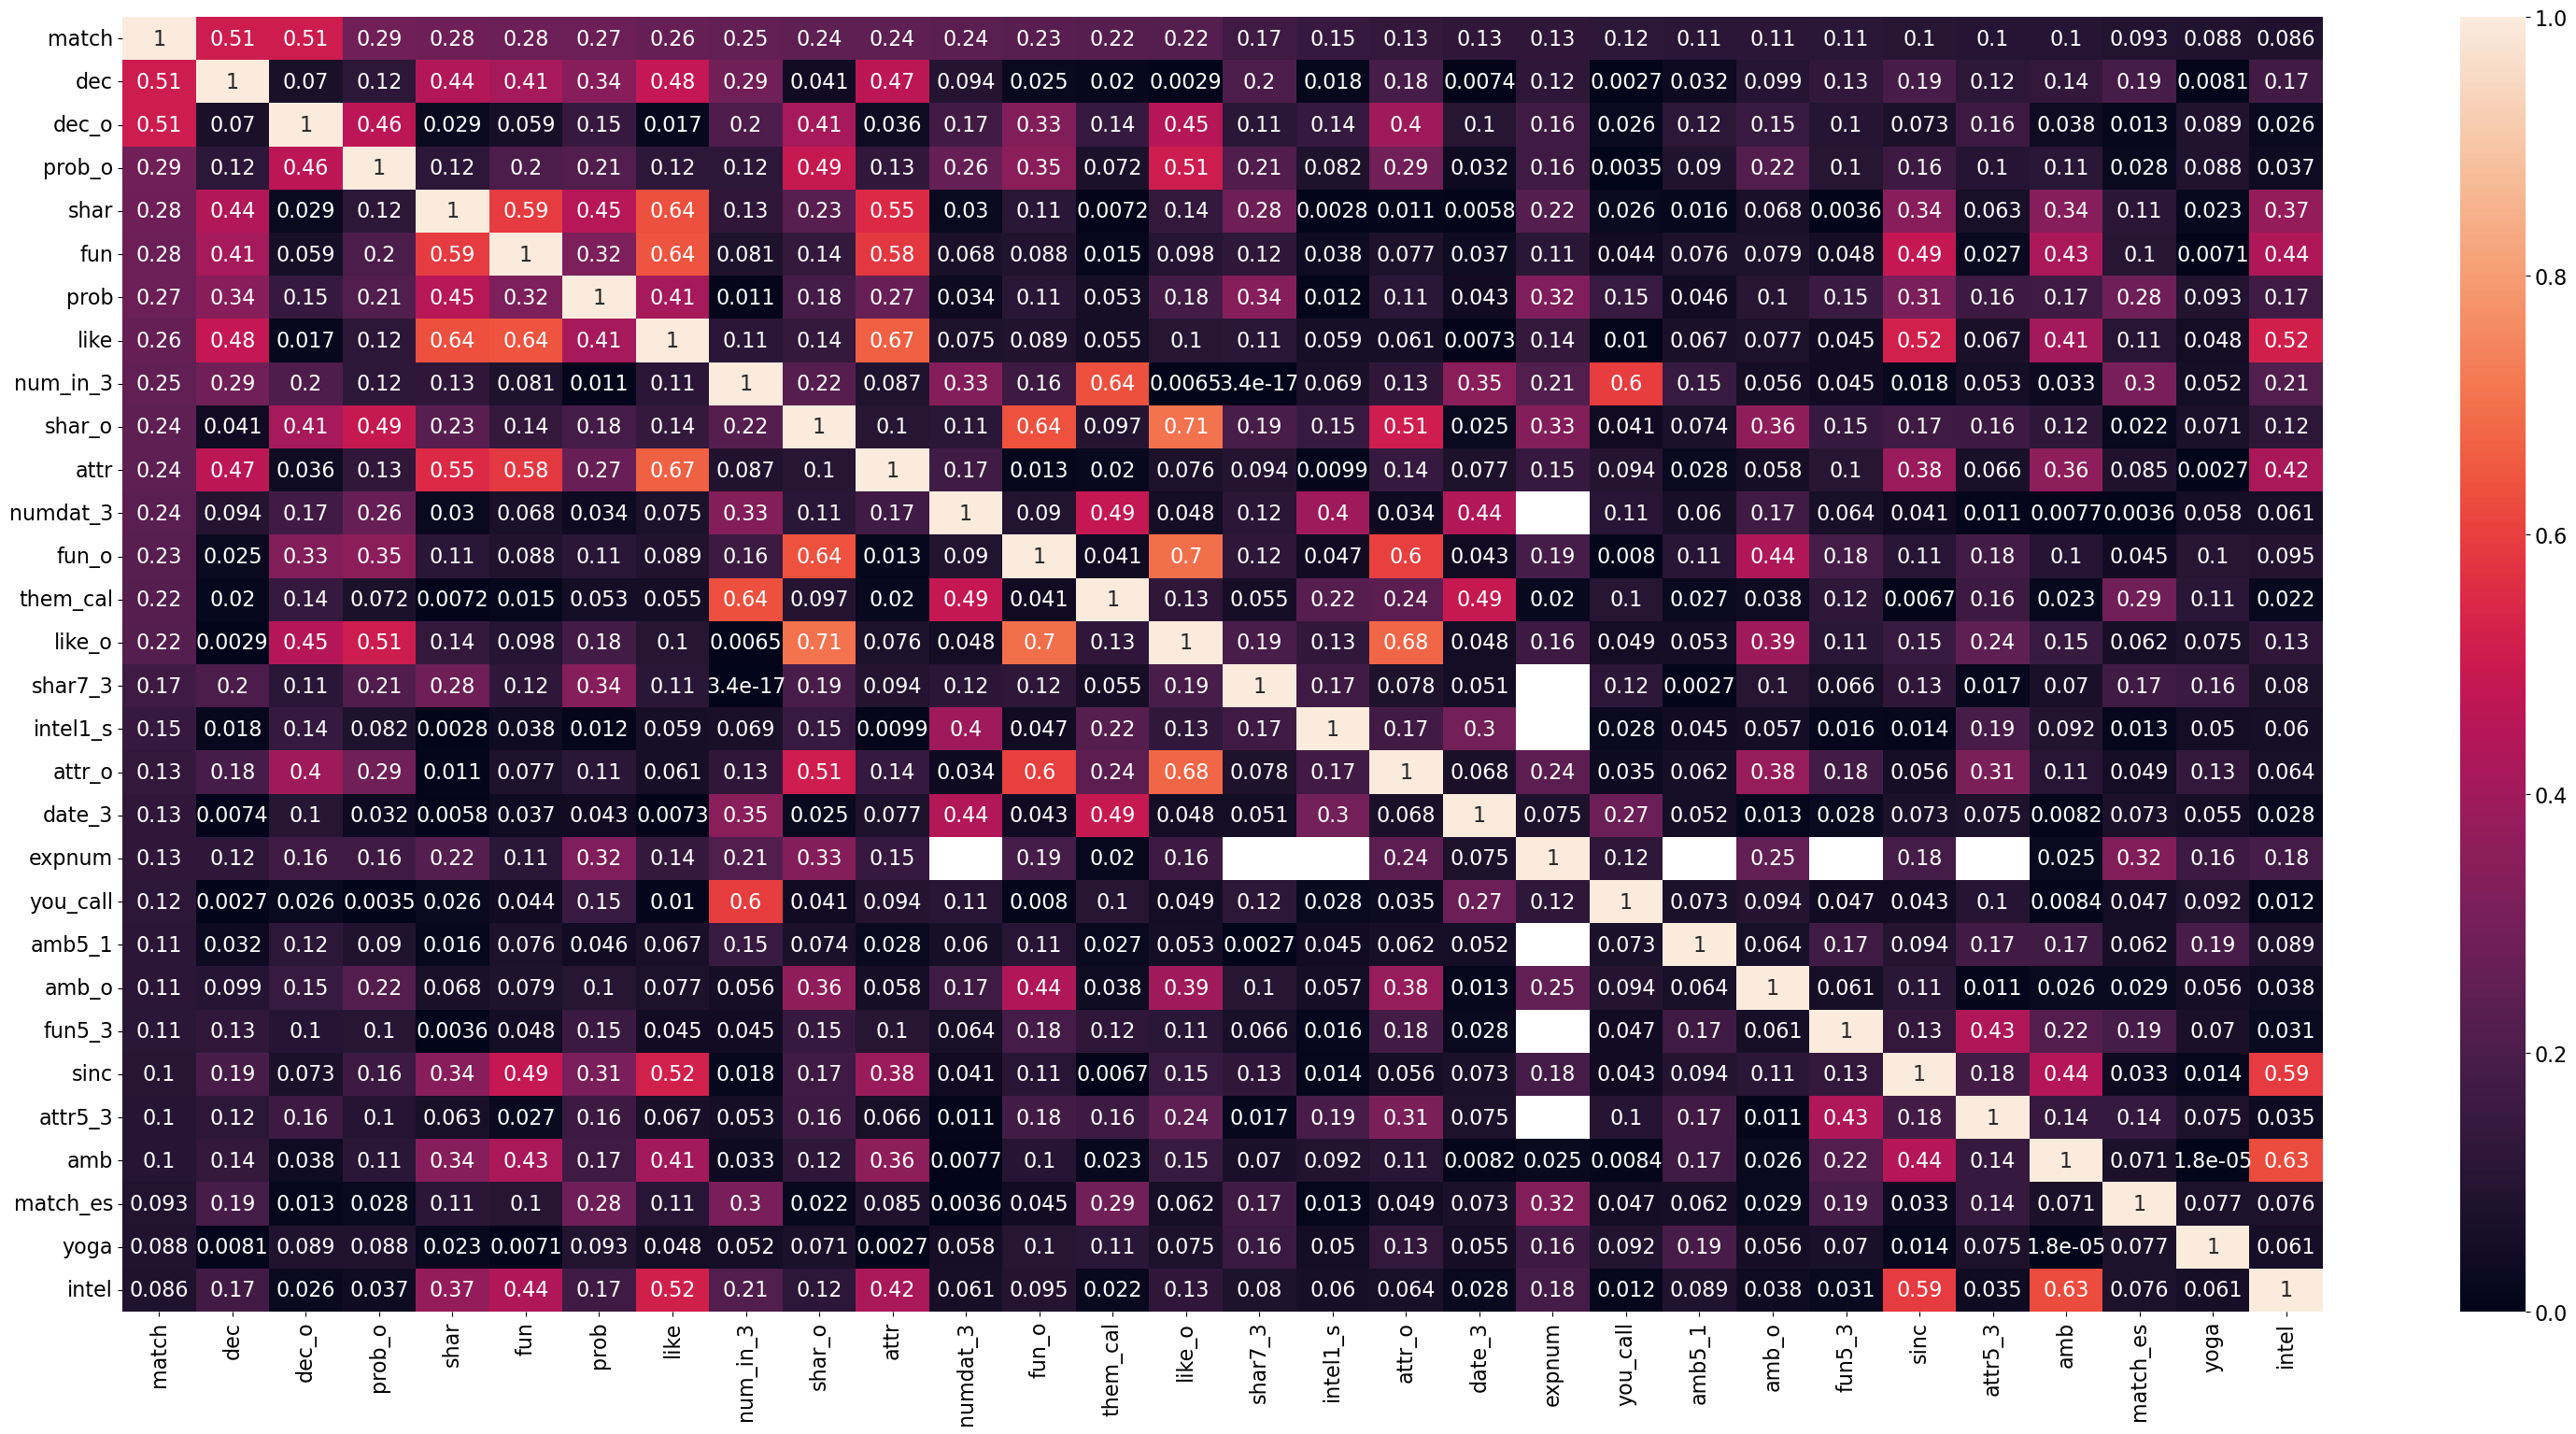

In [57]:
cols_index = top_features.head(30).index

plt.figure(figsize =(38,18))

sns.heatmap(df_participants[cols_index].corr().abs(), annot=True)

__FIGURE INTERPRETATION__<br><br>

- It seems like matching or not (column 'match') is mostly correlated to the partners decision (column 'dec_o') and by the Men and Women own decision (column 'dec') regarding this partner.

- Also, in terms of attributes, the following are the most correlataded to influence the matching with the opposite sex:

    * 1 - sharing the same interest (column 'shar')
    * 2 - being fun ( column 'fun') 
    * 3 - being likeable (column 'like') 
    * 4 - being attractive (column 'attr')
    * 5 - being sincere (column 'sinc')
    * 6 - being ambitious (column 'amb') <br><br>

- The round you date your partner have very few influence on the match according to this matrix. 

<i>Note: we know what 'prob' means thanks to the speed dating keys document. However, we do not have any information regarding 'prob_o'. Having said that, it seems like when the authors of this study adds '_o' to the column name, it means that it concerns the partners decision. However, 'prob' already concerns the partners decision. This is why, in order to avoid any misunderstanding, we do not conclude anything regarding those columns</i>

---------
### __5. MATCH SUCESS BY PARTICIPANTS BACKGROUND SPECIFICITY__
---------

In [58]:
bivariate_graph_plot2(df_participants, 'race', 'match', 'Match success by race')

In [59]:
pd.DataFrame((df_participants.groupby('race')['match'].mean().sort_values(ascending = False)).round(2))

,match
race,
European/Caucasian-American,0.17
Latino/Hispanic American,0.14
Asian/Pacific Islander/Asian-American,0.14
Other,0.14
Black/African American,0.04


__FIGURE INTERPRETATION__<br><br>

- european had the most match

In [60]:
bivariate_graph_plot2(df_participants, 'samerace', 'match', 'Match success if participants have or not the same race')

__FIGURE INTERPRETATION__<br><br>

- having the same race was not determinant in having a match

In [61]:
bivariate_graph_plot2(df_participants, 'go_out', 'match', 'Match success by going out frequency')

__FIGURE INTERPRETATION__<br><br>

- People who got out several times a week are the ones who got the most match

In [62]:
bivariate_graph_plot2(df_participants, 'date', 'match', 'Match success by dates frequency')

__FIGURE INTERPRETATION__<br><br>

- People who date other people at least twice a month are the one with the most match

In [63]:
bivariate_graph_plot2(df_participants, 'position', 'match', 'Match Success by Waves Number')

__FIGURE INTERPRETATION__<br><br>

- Participants who met their partner during the first station number, the first waves, between wave 1 and 9 had the most match

In [64]:
bivariate_graph_plot2(df_participants, 'attr_o', 'match', "Partner's ratting the night of the event for all 6 attributes")

__FIGURE INTERPRETATION__<br><br>

- Participants who received an 8/10 for their 6 attributes had the most match. Strangely enough, people who received a 5/10 for their attributes received more match than participants who received a 10/10

In [65]:
bivariate_graph_plot2(df_participants, 'race_o', 'match', "Match sucess by partner's ethnic background")

__`NOTEBOOK END`__